# Boston:

In [43]:
import pandas as pd
a=pd.read_csv('/home/govardhan/Downloads/Boston.csv')
a.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
from sklearn.cluster import KMeans

In [45]:
km=KMeans()
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
wcss=[]
for i in range(1,10):
    model=KMeans(init='k-means++',n_clusters=i)
    model1=model.fit(a)
    wcss.append(model1.inertia_)

In [47]:
wcss

[19401063.96659758,
 5764994.26870575,
 3068499.4545669407,
 1814437.5009567766,
 1475549.4826214896,
 1166645.01889241,
 990495.4443408381,
 879479.3286578234,
 783663.9739188657]

In [48]:
import matplotlib.pyplot as plt

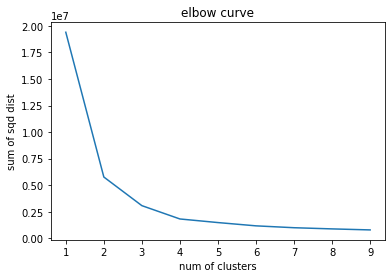

In [58]:
plt.plot(range(1,10),wcss)
plt.title('elbow curve')
plt.xlabel('num of clusters')
plt.ylabel('sum of sqd dist')
plt.show()

In [50]:
model=KMeans(init='k-means++',n_clusters=3)
model1=model.fit(a)

In [51]:
clus_centers=pd.DataFrame(model1.cluster_centers_)
clus_centers.columns=a.columns
clus_centers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,10.910511,5.329071e-15,18.572549,0.078431,0.671225,5.982265,89.913725,2.077164,23.019608,668.205882,20.195098,371.803039,17.874020,17.429412
1,0.374993,1.571038e+01,8.359536,0.071038,0.509863,6.391653,60.413388,4.460745,4.450820,311.232240,17.817760,383.489809,10.388661,24.931694
2,15.219038,-5.329071e-15,17.926842,0.026316,0.673711,6.065500,89.905263,1.994429,22.500000,644.736842,19.928947,57.786316,20.448684,13.126316


In [52]:
model1.inertia_

3068499.4545669407

In [53]:
cluster=pd.DataFrame(model1.labels_)
cluster.columns=["cluster"]
a1=pd.concat([a,cluster],axis=1)

In [54]:
a1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [55]:
b=model1.predict(a)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(b,cluster))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       366
           2       1.00      1.00      1.00        38

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506

